# OU Course Descriptions
This script is designed to scrap the 2018-2019 course descriptions off this website: http://ou-public.courseleaf.com/courses/. 


In [5]:
#Import Libraries
from bs4 import BeautifulSoup 
import requests
import re
import csv

In [6]:
#Grab data from url and parse into HTML elements using BS
r = requests.get('http://ou-public.courseleaf.com/courses/')
soup=BeautifulSoup(r.text, 'html.parser')

In [7]:
#Finding all the links on the page
links = soup.find_all('a')
#Saving links to pages of descriptions as pages
pages = links[69:-14]

In [8]:
#Creating Lists for Data
unique_ids = ['Unique_ID']
titles = ['Title']
numbers = ['Number']
credits = ['Credits']
descriptions =['Description']
departments = ['Department']

#Loop that goes through each departments page and pull relevant info
for link in pages:
    url = 'http://ou-public.courseleaf.com' + str(link.get('href'))
    page_r = requests.get(url)
    page_soup=BeautifulSoup(page_r.text, 'html.parser')
    print('Scraped data from: ',url)
    #Go through the courseblock title noindent field to pull out data
    for item in page_soup.find_all('p', class_="courseblocktitle noindent"):
        #Get department from url and append
        department = link.get('href')[9:-1]
        departments.append(department)
        #Splits the p block at each .
        list_url = item.get_text().split('.')
        #appends the approriate split sections into the correct list
        numbers.append(list_url[0][-4:].strip())
        titles.append(list_url[1].strip())
        unique_ids.append(link.get('href')[9:-1] + '-' + list_url[0][-4:].strip())
    
    #Grab and append each credit hour field
    for item in page_soup.findAll('span', class_="credits"):
        credits.append(item.get_text())
    
    #Grab and append each course description
    for item in page_soup.findAll('p', class_="courseblockdesc"):
        descriptions.append(item.get_text(strip="TRUE"))
print('Done Scraping!')

Scraped data from:  http://ou-public.courseleaf.com/courses/a_hi/
Scraped data from:  http://ou-public.courseleaf.com/courses/acct/
Scraped data from:  http://ou-public.courseleaf.com/courses/aero/
Scraped data from:  http://ou-public.courseleaf.com/courses/afam/
Scraped data from:  http://ou-public.courseleaf.com/courses/agsc/
Scraped data from:  http://ou-public.courseleaf.com/courses/ahs/
Scraped data from:  http://ou-public.courseleaf.com/courses/ame/
Scraped data from:  http://ou-public.courseleaf.com/courses/amgt/
Scraped data from:  http://ou-public.courseleaf.com/courses/anth/
Scraped data from:  http://ou-public.courseleaf.com/courses/arab/
Scraped data from:  http://ou-public.courseleaf.com/courses/arch/
Scraped data from:  http://ou-public.courseleaf.com/courses/arnm/
Scraped data from:  http://ou-public.courseleaf.com/courses/art/
Scraped data from:  http://ou-public.courseleaf.com/courses/artc/
Scraped data from:  http://ou-public.courseleaf.com/courses/arth/
Scraped data 

Scraped data from:  http://ou-public.courseleaf.com/courses/lgbt/
Scraped data from:  http://ou-public.courseleaf.com/courses/ling/
Scraped data from:  http://ou-public.courseleaf.com/courses/lis/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsal/
Scraped data from:  http://ou-public.courseleaf.com/courses/lscj/
Scraped data from:  http://ou-public.courseleaf.com/courses/lscs/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsha/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsis/
Scraped data from:  http://ou-public.courseleaf.com/courses/lslc/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsms/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsps/
Scraped data from:  http://ou-public.courseleaf.com/courses/lsrl/
Scraped data from:  http://ou-public.courseleaf.com/courses/lstd/
Scraped data from:  http://ou-public.courseleaf.com/courses/ltrs/
Scraped data from:  http://ou-public.courseleaf.com/courses/m_s/
Scraped data

In [7]:
with open('data.csv','w') as outfile:
    rowlists = zip(unique_ids,departments,numbers,titles, credits, descriptions)
    writer = csv.writer(outfile)
    for row in rowlists:
        writer.writerows([row])
print('Saved CSV file of courses')

Saved CSV file of courses


In [10]:
import pandas as pd
#Creating Dataframe from lists
courses = pd.DataFrame(
    {'Title': titles[1:] ,
     'Number': numbers[1:],
     'Credits': credits[1:],
     'Description': descriptions[1:],
     'Departments': departments[1:],
     'Unique_ID' : unique_ids[1:]
    })
#Setting to index by Unique_IDs
courses.set_index('Unique_ID')
#Display first 5 lines
courses.head(n=5)

Credits Departments  \
0    3 Credit Hours.        a_hi   
1    4 Credit Hours.        a_hi   
2    3 Credit Hours.        a_hi   
3    3 Credit Hours.        a_hi   
4  2-6 Credit Hours.        a_hi   

                                         Description Number  \
0  Explanation and analysis of the principles und...   1113   
1  Students will be introduced to basic concepts ...   2014   
2  The visual arts from the prehistoric through t...   2213   
3  The visual arts from the Renaissance to the pr...   2223   
4  2-6 hours.; Prerequisite:  Permission of instr...   2930   

                         Title  Unique_ID  
0     The Understanding of Art  a_hi-1113  
1  Introduction to Art History  a_hi-2014  
2                 Global Art I  a_hi-2213  
3                Global Art II  a_hi-2223  
4               Special Topics  a_hi-2930

In [11]:
def search_courses(term):
    results = courses[courses.Description.str.contains(term)]
    print(str(len(results)), 'courses found', '\n')
    print('From the following', str(len(results.Departments.unique())), 'departments:', 
          results.Departments.unique(), '\n')
    response = input('Would you like to save the result to a csv? ')
    print('\n')
    if response.lower() == "yes" or response.lower() == "y":
        results.to_csv("results/"+ term +".csv")
        print('Saved result to csv as '+ term + ".csv in the results folder.", '\n')
    else:
        print('Did not save results to csv, but preview is available below.')
    return results

In [12]:
#Example of searching course descriptions for key terms
search_courses('digital')

72 courses found 

From the following 26 departments: ['a_hi' 'afam' 'ame' 'arch' 'art' 'artc' 'atc' 'cas' 'cees' 'ch_e' 'ece'
 'edrg' 'engl' 'engr' 'fms' 'geog' 'gis' 'hsci' 'jmc' 'lis' 'lscj' 'metr'
 'mis' 'mutk' 'p_e' 'phys'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


Credits Departments  \
17    3 Credit Hours.        a_hi   
23    3 Credit Hours.        a_hi   
180   3 Credit Hours.        afam   
248   3 Credit Hours.         ame   
264   3 Credit Hours.         ame   
566   5 Credit Hours.        arch   
606   3 Credit Hours.        arch   
644   3 Credit Hours.        arch   
691   3 Credit Hours.         art   
697   3 Credit Hours.         art   
708   3 Credit Hours.         art   
710   3 Credit Hours.         art   
712   3 Credit Hours.         art   
714   3 Credit Hours.         art   
718   3 Credit Hours.         art   
739   3 Credit Hours.         art   
744   3 Credit Hours.         art   
896   3 Credit Hours.        artc   
961   3 Credit Hours.         atc   
1365  2 Credit Hours.         cas   
1430  3 Credit Hours.        cees   
1523  3 Credit Hours.        ch_e   
1528  3 Credit Hours.        ch_e   
2250  3 Credit Hours.         ece   
2251  3 Credit Hours.         ece   
2260  3 Credit Hours.         ece   
2262  3 Credit Hours.         ece   
2280  3 Credit Hours.         ece   
2303  3 Credit Hours.         ece   
2305  3 Credit Hours.         ece   
...               ...         ...   
3820  3 Credit Hours.        geog   
3997  3 Credit Hours.         gis   
4009  3 Credit Hours.         gis   
4607  3 Credit Hours.        hsci   
4618  3 Credit Hours.        hsci   
4619  3 Credit Hours.        hsci   
4628   1 Credit Hour.        hsci   
4629  3 Credit Hours.        hsci   
4630  3 Credit Hours.        hsci   
5035  3 Credit Hours.         jmc   
5064  3 Credit Hours.         jmc   
5106  3 Credit Hours.         jmc   
5132  3 Credit Hours.         jmc   
5170  3 Credit Hours.         jmc   
5454  3 Credit Hours.         lis   
5480  3 Credit Hours.         lis   
5481  3 Credit Hours.         lis   
5485  3 Credit Hours.         lis   
5488  3 Credit Hours.         lis   
5492  3 Credit Hours.         lis   
5505  3 Credit Hours.         lis   
5611  3 Credit Hours.        lscj   
6139  3 Credit Hours.        metr   
6143  3 Credit Hours.        metr   
6230  3 Credit Hours.         mis   
6766  3 Credit Hours.        mutk   
6767  3 Credit Hours.        mutk   
6771  3 Credit Hours.        mutk   
6917  3 Credit Hours.         p_e   
7363  3 Credit Hours.        phys   

                                            Description Number  \
17    Prerequisite: Junior standing. This course cov...   3693   
23    Prerequisites: junior standing. Explores appro...   3913   
180   This course focuses on the issue of the digita...   2913   
248   Prerequisite:PHYS 2514;MATH 1823or1914;MATH 24...   2623   
264   Prerequisites:AME 2402orCH E 2002or ENGR 2003 ...   3723   
566   Prerequisite: Co-requisites:ARCH 1163or permis...   1155   
606   (Slashlisted withARCH 5773) Prerequisite: seni...   4773   
644   (Slashlisted withARCH 4773) Prerequisite: Grad...   5773   
691   Prerequisites: majors only;ART 1033andART 1043...   2533   
697   Prerequisite: majors only; ART 1013, ART 1023,...   2873   
708   Prerequisites: majors only; junior standing;AR...   3533   
710   Prerequisites: majors only; junior standing;AR...   3563   
712   Prerequisite: majors only;ART 2743. May be rep...   3753   
714   Prerequisite: 2813. Continuation of Filmmaking...   3813   
718   Prerequisite: majors only; Art 2853. Explores ...   3863   
739   Prerequisite: 3810 or 3873. May be repeated wi...   4813   
744   Prerequisite: majors only;ART 2853orATC 2853an...   4863   
896   Prerequisite:ENGL 1213. An introduction to the...   2813   
961   Prerequisite: Majors only;ART 1033andART 1043....   2823   
1365  Prerequisite: junior standing or permission of...   3002   
1430  Prerequisites:CEES 2213,CEES 3403andMATH 2433o...   4453   
1523  Prerequisites: CHE 2002 (or concurrent enrollm...   3723   
1528  Prerequisite: 4473. Formulation of first-order...   4153   
2250  (Slashlisted with 5213) Prerequisite: 3793.  D...   4213   
2251  Prerequisites:ECE 3223andECE 3873. Design of d...   4273   
226

In [13]:
#To search two differnt terms use the | symbol
search_courses('innovation|innovative')

33 courses found 

From the following 19 departments: ['a_hi' 'ame' 'anth' 'arch' 'b_ad' 'econ' 'edah' 'edsp' 'engl' 'engr'
 'ent' 'geog' 'h_r' 'hist' 'jmc' 'law' 'lsal' 'mkt' 'psy'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


Credits Departments  \
38      3 Credit Hours.        a_hi   
72      3 Credit Hours.        a_hi   
278     3 Credit Hours.         ame   
310     3 Credit Hours.         ame   
413     3 Credit Hours.        anth   
618     5 Credit Hours.        arch   
649     5 Credit Hours.        arch   
654     6 Credit Hours.        arch   
668     6 Credit Hours.        arch   
1044    0 Credit Hours.        b_ad   
1053    0 Credit Hours.        b_ad   
1058    2 Credit Hours.        b_ad   
2397    3 Credit Hours.        econ   
2445    3 Credit Hours.        edah   
2990    3 Credit Hours.        edsp   
3371    3 Credit Hours.        engl   
3400    3 Credit Hours.        engr   
3401     1 Credit Hour.        engr   
3471    3 Credit Hours.         ent   
3474    3 Credit Hours.         ent   
3476    3 Credit Hours.         ent   
3477    3 Credit Hours.         ent   
3755    3 Credit Hours.        geog   
3777    3 Credit Hours.        geog   
4108    3 Credit Hours.         h_r   
4194    3 Credit Hours.         h_r   
4399    3 Credit Hours.        hist   
5116  1-3 Credit Hours.         jmc   
5324    3 Credit Hours.         law   
5536    3 Credit Hours.        lsal   
5545    3 Credit Hours.        lsal   
6284    3 Credit Hours.         mkt   
7519    3 Credit Hours.         psy   

                                            Description Number  \
38    (Slashlisted with 5503) Prerequisite: junior s...   4503   
72    (Slashlisted with 4503) Prerequisite: graduate...   5503   
278   (Slashlisted withAME 5303) Prerequisite: All s...   4303   
310   (Slashlisted withAME 4303) Prerequisite: Gradu...   5303   
413   Prerequisite:ANTH 3203or permission of instruc...   4183   
618   Prerequisite: ARCH 5922,ARCH 5955, or permissi...   5055   
649   Prerequisite: ARCH 4823,ARCH 4855or permission...   5955   
654   Prerequisite: Program admission or permission ...   6056   
668   Prerequisite: Program admission or permission ...   6956   
1044  Prerequisite: admission to full-time MBA progr...   5100   
1053  Prerequisite: 5100, admission to full-time MBA...   5200   
1058  Prerequisite: graduate standing and department...   5822   
2397  Prerequisite: 6343. Examines advanced topics i...   6373   
2445  Prerequisite: graduate standing. Designed to p...   5493   
2990  Prerequisite: Graduate standing. Focus will be...   5183   
3371  Prerequisite: graduate standing and permission...   6113   
3400  Prerequisites: sophomore standing, junior stan...   4023   
3401  Prerequisite: Junior standing or instructor pe...   4051   
3471  Explore the basic concepts of innovation and e...   2113   
3474  Prerequisite: Student must be approved for deg...   3123   
3476  Prerequisite: student must be approved for deg...   3203   
3477  Prerequisite: Student must be approved for deg...   3413   
3755  Introduction to reading, analyzing and interpr...   1113   
3777  Definition and evaluation of mineral, agricult...   3563   
4108  Prerequiste:3013 or junior standing, or permis...   3203   
4194  Prerequisite: graduate standing or permission ...   5713   
4399  Prerequisite:HIST 1483,HIST 1493, junior stand...   3093   
5116  1 to 3 hours. Prerequisite: permission of inst...   4970   
5324  Prerequisite:LAW 5433orLAW 5434. This course o...   5743   
5536  Prerequisite: junior standing or permission fr...   3533   
5545  Prerequisites: Sophomore standing andLSAL 4163...   4643   
6284  Prerequisite: Student must be approved for deg...   3413   
7519  Prerequisite: 5703. This graduate seminar exam...   6713   

                                                  Title  Unique_ID  
38    Art of the 18th Century: The Age of Enlightenment  a_hi-4503  
72    Art of the 18th Century: The Age of Enlightenment  a_hi-5503  
278                       Designing for Open Innovation   ame-4303  
310                       Designing for Open Innovation   ame-5303  
413                    Anthropology of Diet & Nutrition  anth-4183  
618            Design X - Comp

In [14]:
search_courses('computer programming')

12 courses found 

From the following 6 departments: ['ame' 'c_s' 'gis' 'metr' 'mis' 'pbio'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


Credits Departments  \
246   2 Credit Hours.         ame   
248   3 Credit Hours.         ame   
271   3 Credit Hours.         ame   
1282   1 Credit Hour.         c_s   
1313  0 Credit Hours.         c_s   
4002  3 Credit Hours.         gis   
4014  3 Credit Hours.         gis   
6088  3 Credit Hours.        metr   
6122  3 Credit Hours.        metr   
6220  3 Credit Hours.         mis   
7188  3 Credit Hours.        pbio   
7208  3 Credit Hours.        pbio   

                                            Description Number  \
246   Prerequisite:MATH 1823or1914or concurrent enro...   2402   
248   Prerequisite:PHYS 2514;MATH 1823or1914;MATH 24...   2623   
271   Prerequisite: senior standing in an Engineerin...   4193   
1282  Prerequisite: (MATH 1523or equivalent or concu...   1321   
1313  Prerequisite: Permission of Instructor. Prepar...   4410   
4002  (Slashlisted withGIS 5733; Crosslisted withPBI...   4733   
4014  (Slashlisted withGIS 4733; Crosslisted withPBI...   5733   
6088  Prerequisite:METR 1313. The basics principles ...   4323   
6122  Prerequisite: Mathematics 4733 or 4753, comput...   5323   
6220  Prerequisite: student must have been approved ...   3213   
7188  (Slashlisted withPBIO 5733; Crosslisted withGI...   4733   
7208  (Slashlisted withPBIO 4733; Crosslisted withGI...   5733   

                                      Title  Unique_ID  
246                   Engineering Computing   ame-2402  
248                    Circuits and Sensors   ame-2623  
271   Introduction to Computer Aided Design   ame-4193  
1282                   Java for Programmers   c_s-1321  
1313                Programming Competition   c_s-4410  
4002           Environmental Remote Sensing   gis-4733  
4014           Environmental Remote Sensing   gis-5733  
6088      Weather Simulation With Computers  metr-4323  
6122                 Time Series Analysis I  metr-5323  
6220                 Business Data Analysis   mis-3213  
7188           Environmental Remote Sensing  pbio-4733  
7208           Environmental Remote Sensing  pbio-5733

In [15]:
search_courses('data')

256 courses found 

From the following 64 departments: ['acct' 'ame' 'anth' 'arch' 'art' 'astr' 'avia' 'b_ad' 'biol' 'bme' 'c_s'
 'cees' 'ch_e' 'chem' 'cns' 'comm' 'dsa' 'eacs' 'ece' 'econ' 'edah' 'edec'
 'eden' 'edlt' 'edsp' 'eipt' 'emba' 'g_e' 'geog' 'geol' 'gis' 'gphy'
 'grad' 'h_r' 'hes' 'i_d' 'ise' 'jmc' 'l_a' 'ling' 'lis' 'lsal' 'lscj'
 'lsis' 'lstd' 'math' 'mbio' 'metr' 'mgt' 'mis' 'mit' 'mkt' 'mued' 'npng'
 'odyn' 'p_e' 'p_sc' 'pbio' 'phch' 'psy' 'rcpl' 's_wk' 'soc' 'tcom'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


Credits Departments  \
123     3 Credit Hours.        acct   
250     2 Credit Hours.         ame   
422     3 Credit Hours.        anth   
424     3 Credit Hours.        anth   
437     3 Credit Hours.        anth   
438     3 Credit Hours.        anth   
440     3 Credit Hours.        anth   
441     3 Credit Hours.        anth   
452     3 Credit Hours.        anth   
475     3 Credit Hours.        anth   
487     3 Credit Hours.        anth   
499     3 Credit Hours.        anth   
503     3 Credit Hours.        anth   
506     3 Credit Hours.        anth   
527   1-3 Credit Hours.        anth   
532     3 Credit Hours.        anth   
580     6 Credit Hours.        arch   
606     3 Credit Hours.        arch   
644     3 Credit Hours.        arch   
715     3 Credit Hours.         art   
952     3 Credit Hours.        astr   
992     3 Credit Hours.        avia   
1048    2 Credit Hours.        b_ad   
1115    3 Credit Hours.        biol   
1121    2 Credit Hours.        biol   
1122     1 Credit Hour.        biol   
1144    3 Credit Hours.        biol   
1145    3 Credit Hours.        biol   
1155    3 Credit Hours.        biol   
1169    3 Credit Hours.        biol   
...                 ...         ...   
6279    3 Credit Hours.         mkt   
6503    2 Credit Hours.        mued   
6849    3 Credit Hours.        npng   
6870    3 Credit Hours.        odyn   
6881    3 Credit Hours.        odyn   
6961    3 Credit Hours.         p_e   
6988    3 Credit Hours.        p_sc   
7013    3 Credit Hours.        p_sc   
7170    3 Credit Hours.        pbio   
7188    3 Credit Hours.        pbio   
7208    3 Credit Hours.        pbio   
7245    3 Credit Hours.        phch   
7450    3 Credit Hours.         psy   
7452    3 Credit Hours.         psy   
7457    4 Credit Hours.         psy   
7499    3 Credit Hours.         psy   
7500    3 Credit Hours.         psy   
7526  1-6 Credit Hours.         psy   
7535    3 Credit Hours.        rcpl   
7551    3 Credit Hours.        rcpl   
7555    2 Credit Hours.        rcpl   
7556    3 Credit Hours.        rcpl   
7674    3 Credit Hours.        s_wk   
7688    3 Credit Hours.        s_wk   
7701    3 Credit Hours.        s_wk   
7788    3 Credit Hours.         soc   
7789    3 Credit Hours.         soc   
7848    3 Credit Hours.         soc   
7854    3 Credit Hours.         soc   
7955    3 Credit Hours.        tcom   

                                            Description Number  \
123   Prerequisite: Student must be approved for deg...   3353   
250   Prerequisite: 2113 or Engineering 2113; 3143 o...   3112   
422   Prerequisite: junior standing or 3 hours of AN...   4343   
424   Prerequisite: junior standing or 3 hours of AN...   4383   
437   Prerequisite:DMAT 0123or satisfactory score on...   4683   
438   Prerequisite: junior standing or 3 hours of AN...   4713   
440   Prerequisite: junior standing or 3 hours of AN...   4743   
441   Prerequisite:ANTH 3113orANTH 3930or permission...   4763   
452   Prerequisite:ANTH 3203or permission of instruc...   4943   
475   Prerequisite: graduate standing. Survey of eth...   5213   
487   Prerequisites: graduate standing. Explores how...   5353   
499   Prerequisite: graduate standing. Introduces th...   5593   
503   Prerequisite: 5623 or permission of instructor...   5633   
506   Prerequisite: Graduate standing. The goal of t...   5693   
527   1 to 3 hours. May be repeated; maximum credit ...   5990   
532   Prerequisite: graduate standing. Survey of the...   6643   
580   Prerequisite:ARCH 2463,ARCH 2456,ARCH 2343, an...   3556   
606   (Slashlisted withARCH 5773) Prerequisite: seni...   4773   
644   (Slashlisted withARCH 4773) Prerequisite: Grad...   5773   
715   Prerequisite: Majors only;ATC 2823. Considerat...   3823   
952   Prerequisite: 3113 or 4303 or permission of in...   5453   
992   Prerequisite: junior standing. Students will b...   3923   
1048  Prerequisite:B AD 5001and graduate standing. I...   5122   
1115  Prerequ

In [16]:
#Loading libraries to do more analysis in python
import nltk, wordcloud, numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

nltk.download('punkt')
nltk.download('stopwords')  
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package punkt to /Users/sclayton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sclayton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sclayton/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
def most_freq_words(term):
    #Selecting data subsample
    data_courses = search_courses(term)
    
    # Cleaning Data
    # Making all lowercase
    data_courses.loc[:,'Description'] = data_courses.loc[:,'Description'].apply(lambda x: " ".join(x.lower() for x in x.split()))

    #Removing puncuation
    data_courses.loc[:,'Description'] = data_courses.loc[:,'Description'].str.replace('[^\w\s*]'," ")

    #Lemmatize strings
    wnl = nltk.stem.WordNetLemmatizer()
    #Need to do for different parts of speech
    data_courses.loc[:,'Description'] = data_courses.loc[:,'Description'].apply(lambda x: " ".join([wnl.lemmatize(x) for x in x.split()]))
    data_courses.loc[:,'Description'] = data_courses.loc[:,'Description'].apply(lambda x: " ".join([wnl.lemmatize(x, 'v') for x in x.split()]))

    #Removing stopwords
    stop = nltk.corpus.stopwords.words('english')
    stop.extend([term,'prerequisite','student','permission','stand','course','instructor','include','credit','may'])
    data_courses.loc[:,'Description'] = data_courses.loc[:,'Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    #Get list of most frequent terms
    top_freq = pd.Series(' '.join(data_courses['Description']).split()).value_counts()[:50]
    
    #plot frequent words
    top_freq.plot(kind="bar", figsize=(20,10), fontsize=20)


    

256 courses found 

From the following 64 departments: ['acct' 'ame' 'anth' 'arch' 'art' 'astr' 'avia' 'b_ad' 'biol' 'bme' 'c_s'
 'cees' 'ch_e' 'chem' 'cns' 'comm' 'dsa' 'eacs' 'ece' 'econ' 'edah' 'edec'
 'eden' 'edlt' 'edsp' 'eipt' 'emba' 'g_e' 'geog' 'geol' 'gis' 'gphy'
 'grad' 'h_r' 'hes' 'i_d' 'ise' 'jmc' 'l_a' 'ling' 'lis' 'lsal' 'lscj'
 'lsis' 'lstd' 'math' 'mbio' 'metr' 'mgt' 'mis' 'mit' 'mkt' 'mued' 'npng'
 'odyn' 'p_e' 'p_sc' 'pbio' 'phch' 'psy' 'rcpl' 's_wk' 'soc' 'tcom'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


/Users/sclayton/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


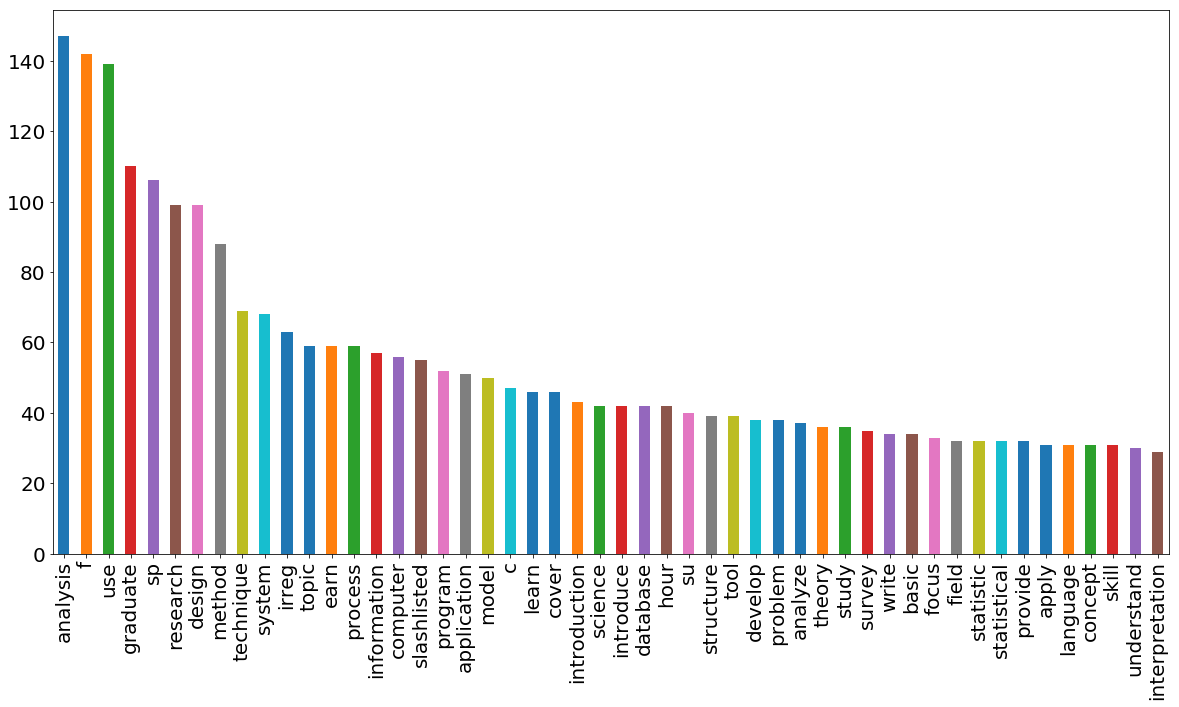

In [18]:
most_freq_words('data')

33 courses found 

From the following 19 departments: ['a_hi' 'ame' 'anth' 'arch' 'b_ad' 'econ' 'edah' 'edsp' 'engl' 'engr'
 'ent' 'geog' 'h_r' 'hist' 'jmc' 'law' 'lsal' 'mkt' 'psy'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


/Users/sclayton/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


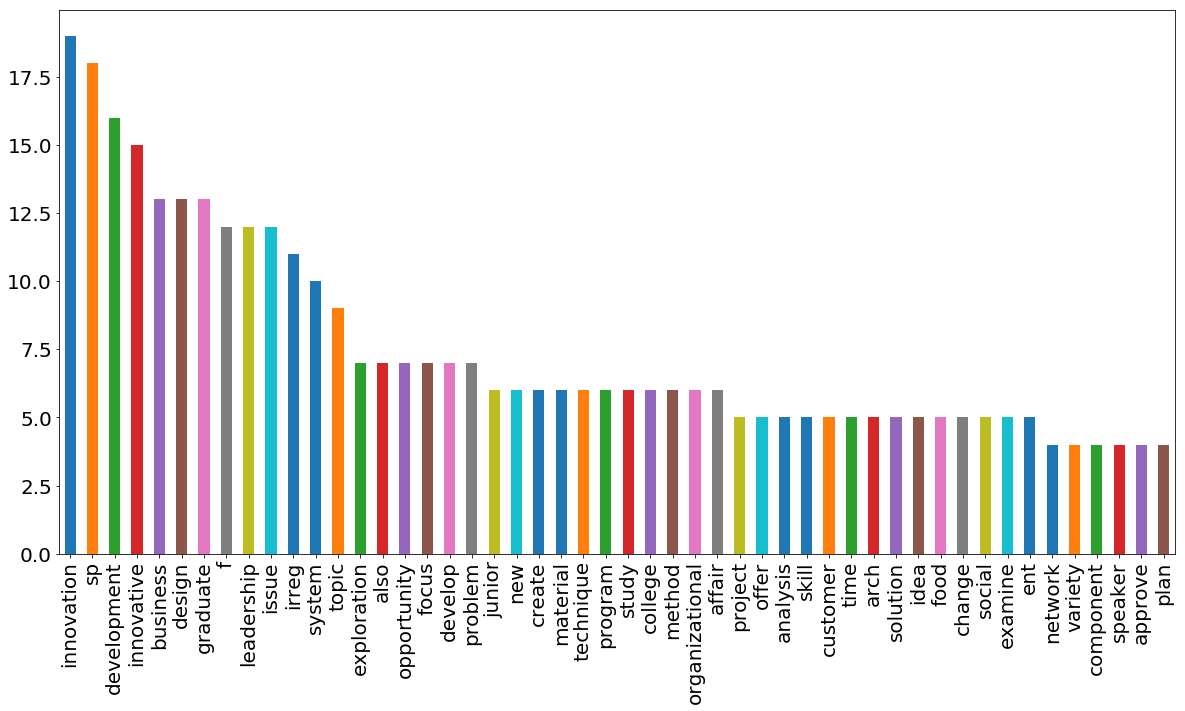

In [19]:
most_freq_words('innovation|innovative')

72 courses found 

From the following 26 departments: ['a_hi' 'afam' 'ame' 'arch' 'art' 'artc' 'atc' 'cas' 'cees' 'ch_e' 'ece'
 'edrg' 'engl' 'engr' 'fms' 'geog' 'gis' 'hsci' 'jmc' 'lis' 'lscj' 'metr'
 'mis' 'mutk' 'p_e' 'phys'] 

Would you like to save the result to a csv? n


Did not save results to csv, but preview is available below.


/Users/sclayton/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


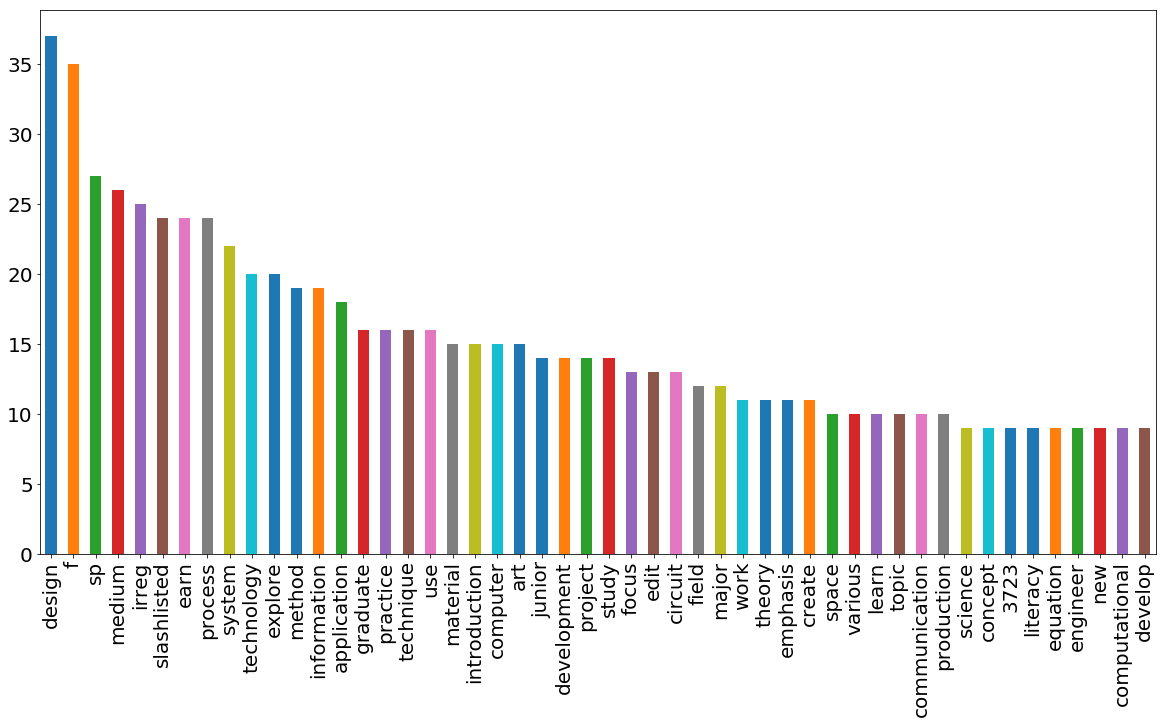

In [20]:
most_freq_words('digital')